In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from bidi.algorithm import get_display
import arabic_reshaper

In [119]:
data=pd.read_csv('data.csv')

In [120]:
data['date']=pd.to_datetime(data['date'])

In [62]:
data.head()

,date,title,id,view,likes,dislikes,comments,duration
0,2018-07-24 16:36:31,بي_بي_سي_ترندينغ: الراقصة المصرية فيفي عبده تر...,8Y6ssmlNDwE,16253.0,137.0,129.0,111.0,118
1,2018-07-24 16:35:50,بي_بي_سي_ترندينغ: محام عراقي يقاضي رئيس الحكوم...,u256oBcAgm8,2896.0,65.0,4.0,15.0,352
2,2018-07-24 16:35:05,بي_بي_سي_ترندينغ: اعلانات وظائف في #السعودية ت...,2d3xepMFqDw,14933.0,111.0,45.0,111.0,352
3,2018-07-24 16:30:58,بي_بي_سي_ترندينغ: قضية فساد كبرى في #الأردن بع...,oZnq8ATMdSE,4627.0,39.0,2.0,6.0,486
4,2018-07-24 16:29:52,بي_بي_سي_ترندينغ: الكشف عن شركة بريطانية تبحث ...,XZSdzXGkHI0,13668.0,170.0,27.0,100.0,186


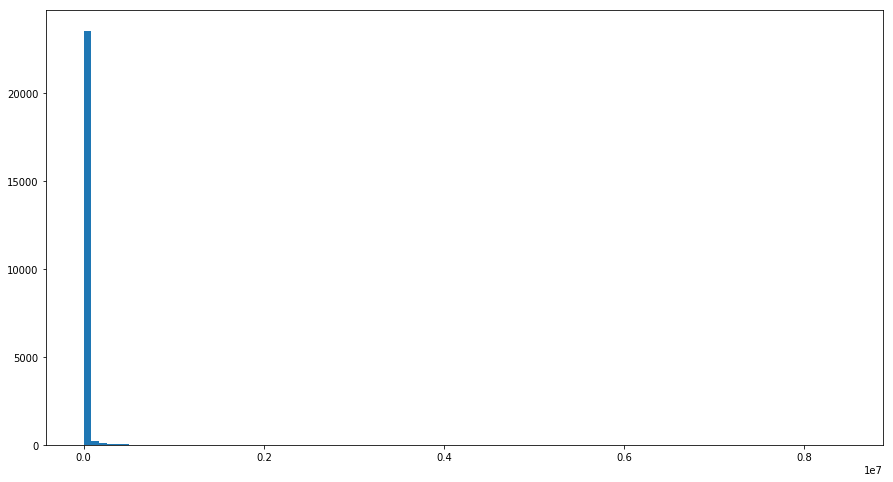

In [63]:
plt.figure(figsize=(15,8))
plt.hist(data['view'].dropna(),bins=100);

# that's ugly,  lets try taking a log-transform of the view count and plot a histogram

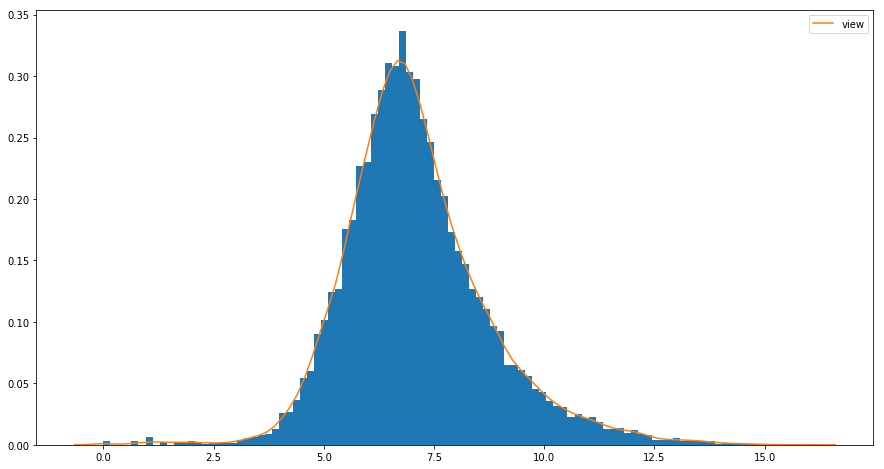

In [64]:
plt.figure(figsize=(15,8))
plt.hist(np.log(1+data['view'].dropna()),density=True,bins=100);
sns.kdeplot(np.log(1+data['view'].dropna()));


### now it's better, seems like the views are normally distributed on a log scale.

# let's see the video duration distribution

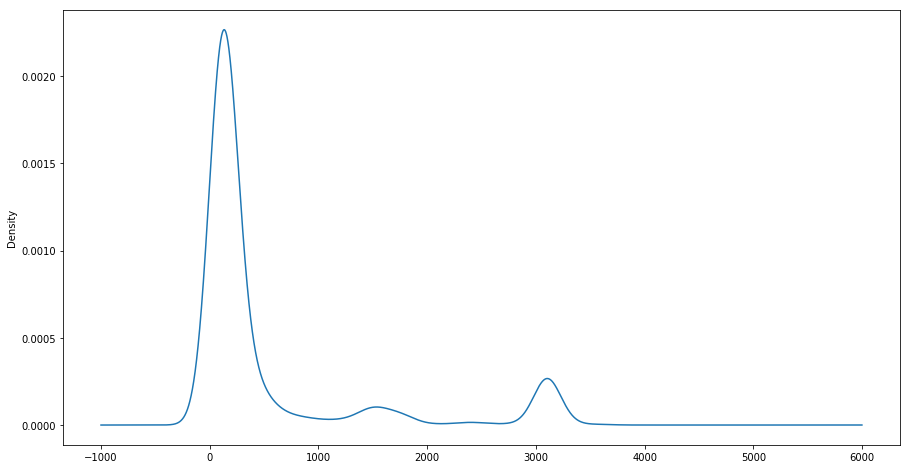

In [65]:
plt.figure(figsize=(15,8))
data['duration'].plot.kde(ind=np.arange(-1000,6000))

## The previous plot is very useful, it shows that the video lengths group naturally into 3 categories, we will use that fact to split each video into its group

### let's look at summary statistics for the our data

In [66]:
data.median()

view        991.0
likes        12.0
dislikes      2.0
comments      0.0
duration    157.0
dtype: float64

In [67]:
data.mean()

view        10620.513606
likes         100.810072
dislikes       22.396790
comments       12.837076
duration      530.031833
dtype: float64

In [68]:
data.std()

view        97064.455308
likes         620.828100
dislikes      190.197436
comments      110.602335
duration      898.030500
dtype: float64

## let's look at the most popular videos, the highest like ratio to dislike ratio, the most likely videos to illicit discussion

### First: the most viewed vids

In [69]:
data.sort_values(by='view',ascending=False)[:20]

,date,title,id,view,likes,dislikes,comments,duration
20591,2011-03-14 15:29:40,صور درامية للتسونامي الذي ضرب اليابان,6scCF_8YN70,8447916.0,15507.0,3800.0,940.0,133
4078,2016-07-06 20:18:17,محطم تمثال صدام حسين نادم على فعلته,J0KhTlkIOLs,3635319.0,15275.0,1675.0,2827.0,129
7055,2014-10-30 15:32:48,سكر فتاة مصرية تحلق شعر الرجال,WbLVcgeGQP8,3490301.0,15523.0,2246.0,1841.0,178
7979,2014-06-21 10:58:21,"قناصة أكراد في معارك مع مسلحي ""داعش""",Su49T8ipy9A,2970802.0,1692.0,600.0,346.0,201
20568,2011-03-17 14:29:57,صور جديدة لتسونامي اليابان المدمر,6fhAnkqcRXQ,2844655.0,NaN,NaN,485.0,144
4524,2016-01-07 17:30:00,سوري يسبح من تركيا إلى اليونان - أنا الشاهد,bya975wK1hM,2492658.0,21515.0,1846.0,NaN,467
5125,2015-08-06 17:00:01,"أنا الشاهد: هل يمكن لبطل رفع أثقال أن يأكل ""سا...",69isJURQyGQ,2485050.0,12328.0,2207.0,659.0,172
3389,2017-03-29 09:09:07,لحظة سقوط الرئيس اللبناني ميشال عون أرضا في ال...,inw-NKNcKaQ,2343650.0,5862.0,2840.0,3105.0,16
2293,2018-01-01 16:59:37,هل انتهى تنظيم الدولة الإسلامية فعلا ؟,ufghbo7LNNY,2150817.0,7397.0,3138.0,5162.0,326
20328,2011-04-10 10:09:43,"كلاب الجيش الروسي تستخدم ""الموبايل""",876bPUp-APE,2064981.0,3043.0,427.0,107.0,105


Text(0.5,1,'Most Viewed Videos statistics')

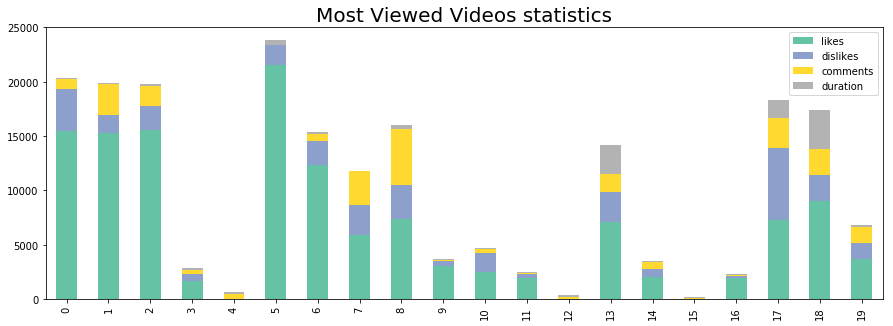

In [71]:
pd.DataFrame(data.sort_values(by='view',ascending=False)[['likes','dislikes','comments','duration']][:20]).plot(kind='bar',stacked=True,figsize=(15,5),use_index=False, cmap=plt.cm.get_cmap("Set2", len(data.index)))
plt.title('Most Viewed Videos statistics',fontdict={'fontsize':20})

# the previous titles are

## let's define a like/dislike ratio

In [73]:
data['like_ratio']=data['likes']/data['dislikes']

In [74]:
#remove infinities resulting from dividing by 0 and replaces them with 0
data['like_ratio']=data['like_ratio'].replace(np.inf,0)
# data.iloc[np.where(data['like_ratio']==np.inf)[0],data.columns.get_loc('like_ratio')]=data.iloc[np.where(data['like_ratio']==np.inf)[0],data.columns.get_loc('likes')]

## videos with the highest like/dislike ratio

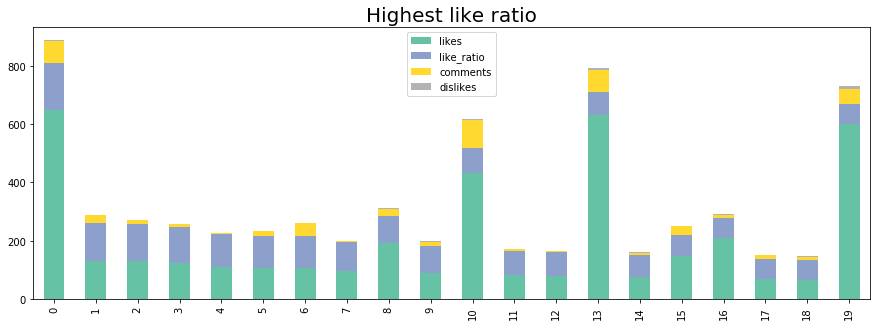

In [75]:
data.sort_values(by='like_ratio',ascending=False)[['likes','like_ratio','comments','dislikes',]][:20].plot(kind='bar',stacked=True,figsize=(15,5),use_index=False, cmap='Set2')
plt.title('Highest like ratio',fontdict={'fontsize':20});

In [80]:
pd.DataFrame(np.arange(0,20),data.sort_values(by='like_ratio',ascending=False)['title'][:20])

,0
title,
ماذا يقدم البرلمانيون العرب مقابل معاشاتهم المريحة؟ برنامج نقطة حوار,0
"""مجيدة ""بائعة متجولة في بغداد .. تتحدى الظروف القاسية",1
تطبيق عماني للتشجيع على القراءة |فورتك|,2
محطة طاقة شمسية في المغرب تستخدم الملح لتوليد الطاقة,3
أسئلة سريعة مع: يايا توري,4
بي_بي_سي_ترندينغ | سكان #كاليفورنيا ينشرون فيديوهات للحراق المنشرة #حرائق_كاليفورنيا,5
الوقت القاتل يواصل صعق #المنتخبات_العربية فى مباراة #تونس_انجلترا بـ #كأس_العالم,6
طالب عراقي يبتكر آلة لقياس الاسطح - 4تك,7
زها حديد تصمم برجا سكنيا في ميامي الأمريكية,8


## Videos with the most comments

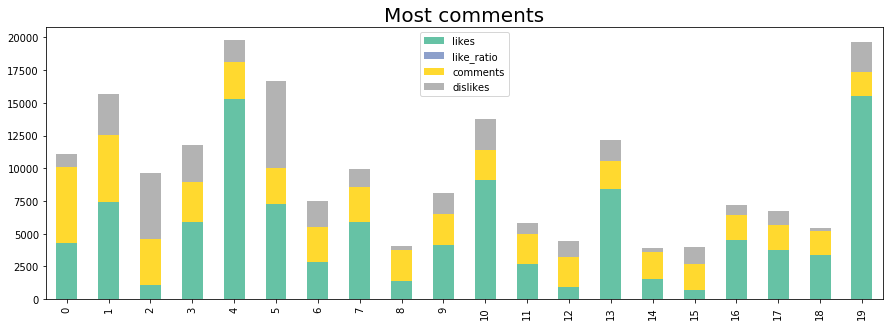

In [77]:
data.sort_values(by='comments',ascending=False)[['likes','like_ratio','comments','dislikes']][:20].plot(kind='bar',stacked=True,figsize=(15,5),use_index=False, cmap='Set2')
plt.title('Most comments',fontdict={'fontsize':20});

In [81]:
pd.DataFrame(np.arange(0,20),data.sort_values(by='comments',ascending=False)['title'][:20])

,0
title,
بي_بي_سي_ترندينغ: إلقاء القبض على سيدة لبنانية في مصر نشرت فيديو مهين للمصريين بعد تعرضها للتحرش,0
هل انتهى تنظيم الدولة الإسلامية فعلا ؟,1
إمام أمريكي مثلي يزوج المسلمين المثليين,2
لحظة سقوط الرئيس اللبناني ميشال عون أرضا في القمة العربية,3
محطم تمثال صدام حسين نادم على فعلته,4
"وثائقي بي بي سي ""أمراء آل سعود المخطوفون""",5
الفيلم الوثائقي: جنود إسرائيل العرب,6
بي_بي_سي_ترندينغ: إمام مسجد أردني يصلي التراويح وحده بعد مغادرة المصلين في منتصف الصلاة #الأردن,7
"بي_بي_سي_ترندينغ | غضب في #السودان من مسلسل ""بلوك غشمرة"" الكويتي #الكويت",8


# Let's define a discussion incentive factor, it's how likely that this video makes people comment. the ratio will equal comments/views

In [86]:
data['discussion_factor']=data['comments']/data['view']

# These are the the videos that has the most comments per view

### let's see their titles

In [116]:
pd.DataFrame(np.arange(0,20),(data[data['view']>1000].sort_values(by='discussion_factor',ascending=False)['title'])[:20])

,0
title,
"بي_بي_سي_ترندينغ | "" مكاني ليس في المطبخ"" شعار حملة #الجزائر للتضامن مع #ريما ضحية الاعتداء",0
بي بي سي عربي: حلقة دنيانا (202): ملحدون عكس التيار,1
بي_بي_سي_ترندينغ | #بالفيديو: #فرحات_مهني يحدث جدلا في #الجزائر بعد دعوته لحمل السلاح,2
ما رأي الدين الإسلامي في الاغتصاب الزوجي؟,3
ملكة جمال العراق تزور صديقتها ملكة جمال إسرائيل,4
بي_بي_سي_ترندينغ | هل سيصبح الإلحاد جريمة في #مصر؟,5
بي_بي_سي_ترندينغ | #مش_بالسيف حملة في #تونس مطالبين باحترام الحريات ورفض غلق المطاعم خلال #رمضان,6
بي_بي_سي_ترندينغ | #منقبة تمنع للمرة الثانية من دخول #تونس وجدل العلمانية و#الحجاب يجتاح المنصات,7
أسرة مترابطة: الأم مسيحية والأب مسلم,8


In [117]:
# pd.DataFrame(np.array((data[data['view']>1000].sort_values(by='discussion_factor',ascending=False)[:20]['title'])))
pd.DataFrame(np.arange(0,20),data[data['view']>1000].sort_values(by='discussion_factor',ascending=False)['title'][:20])

,0
title,
"بي_بي_سي_ترندينغ | "" مكاني ليس في المطبخ"" شعار حملة #الجزائر للتضامن مع #ريما ضحية الاعتداء",0
بي بي سي عربي: حلقة دنيانا (202): ملحدون عكس التيار,1
بي_بي_سي_ترندينغ | #بالفيديو: #فرحات_مهني يحدث جدلا في #الجزائر بعد دعوته لحمل السلاح,2
ما رأي الدين الإسلامي في الاغتصاب الزوجي؟,3
ملكة جمال العراق تزور صديقتها ملكة جمال إسرائيل,4
بي_بي_سي_ترندينغ | هل سيصبح الإلحاد جريمة في #مصر؟,5
بي_بي_سي_ترندينغ | #مش_بالسيف حملة في #تونس مطالبين باحترام الحريات ورفض غلق المطاعم خلال #رمضان,6
بي_بي_سي_ترندينغ | #منقبة تمنع للمرة الثانية من دخول #تونس وجدل العلمانية و#الحجاب يجتاح المنصات,7
أسرة مترابطة: الأم مسيحية والأب مسلم,8


### thye're mostly about religion or women rights, these are the most likely to illicit discussion

# let's look at a monthly time-series of the view count, to observe the channel popularity over the years

In [128]:
#add a year and a month block to the time series
data['year_block']=data['date'].apply(lambda x:(x.year)-2009)
data['month_block']=data['date'].apply(lambda x: x.month-10 + 12*(x.year-2009)
                                      )

In [25]:
data[0:1]['date'][0]

Timestamp('2018-07-24 16:36:31')

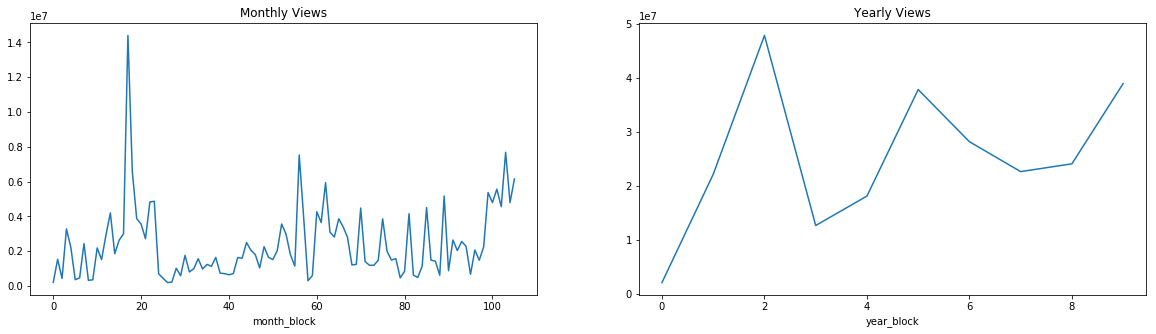

In [26]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.title('Monthly Views')
data.groupby('month_block').sum()['view'].plot()
plt.subplot(1,2,2)
plt.title('Yearly Views')
data.groupby('year_block').sum()['view'].plot()

## The channel views count seem to be stable

## Let's explore the time series of the other attributes

In [126]:
#a function to exploit
def ts_plot(attribute):    
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    plt.title('Monthly '+attribute)
    data[data['month_block']<data['month_block'].max()].groupby('month_block').sum()[attribute].plot()
    plt.subplot(1,2,2)
    plt.title('Yearly '+attribute)
    data[data['month_block']<data['month_block'].max()].groupby('year_block').sum()[attribute].plot()

In [178]:
data.groupby('year_block').count()

,date,title,id,view,likes,dislikes,comments,duration,group,month_block
year_block,,,,,,,,,,
0,605,605,605,605,1,1,605,605,605,605
1,2226,2226,2226,2226,100,100,2176,2226,2226,2226
2,2483,2483,2483,2483,532,532,2457,2483,2482,2483
3,3732,3732,3732,3732,569,569,3732,3732,3732,3732
4,4609,4609,4609,4608,557,557,4608,4609,4609,4609
5,3923,3923,3923,3921,1100,1100,3525,3923,3923,3923
6,1866,1866,1866,1866,1620,1620,1616,1866,1864,1866
7,886,886,886,886,886,886,884,886,886,886
8,1367,1367,1367,1367,1367,1367,1303,1367,1367,1367


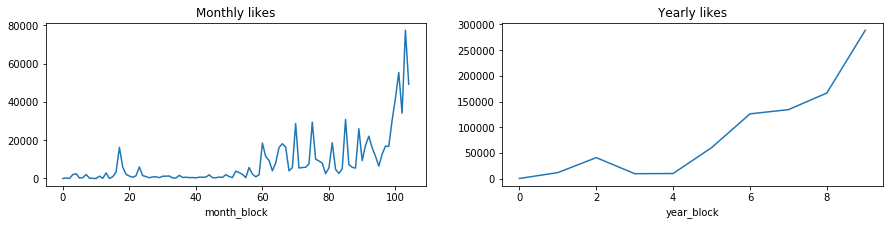

In [28]:
ts_plot('likes')

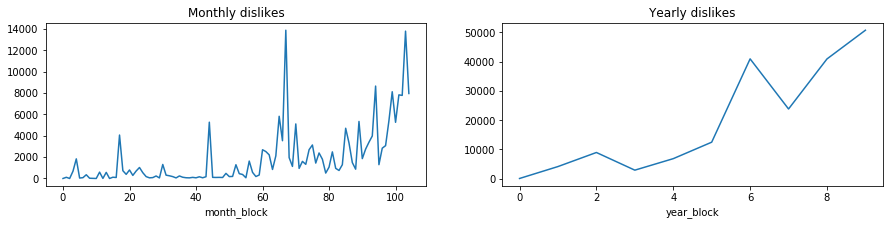

In [29]:
ts_plot('dislikes')

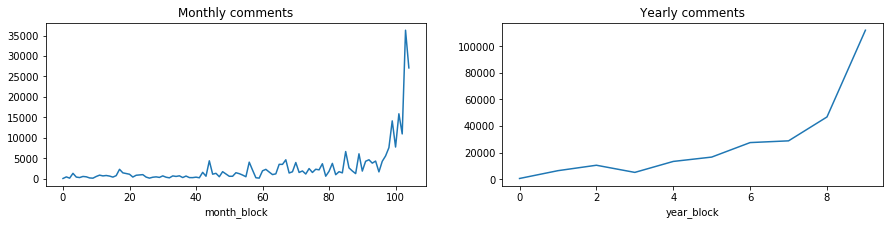

In [30]:
ts_plot('comments')

# the likes, dislikes and comment count is exhibiting an increasing trend

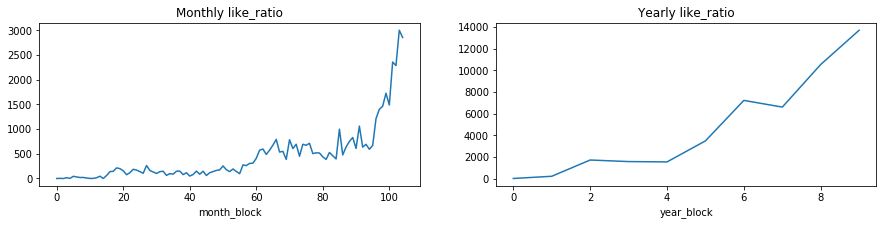

In [31]:
ts_plot('like_ratio')

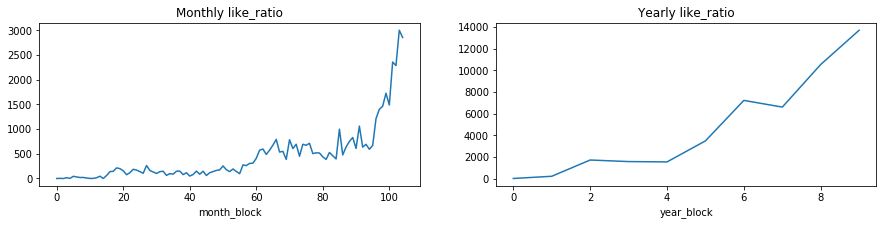

In [32]:
ts_plot('like_ratio')

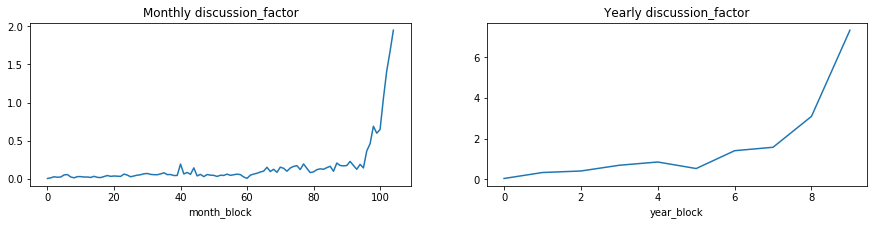

In [33]:
ts_plot('discussion_factor')

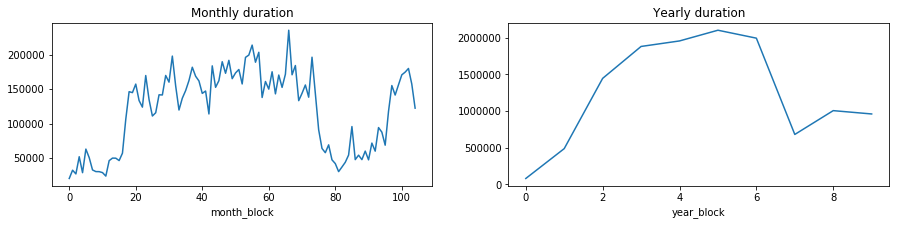

In [34]:
ts_plot('duration')

In [35]:
data.columns

Index(['date', 'title', 'id', 'view', 'likes', 'dislikes', 'comments',
       'duration', 'like_ratio', 'discussion_factor', 'year_block',
       'month_block'],
      dtype='object')

# Let's split the videos into 3 length groups according to it's histogram

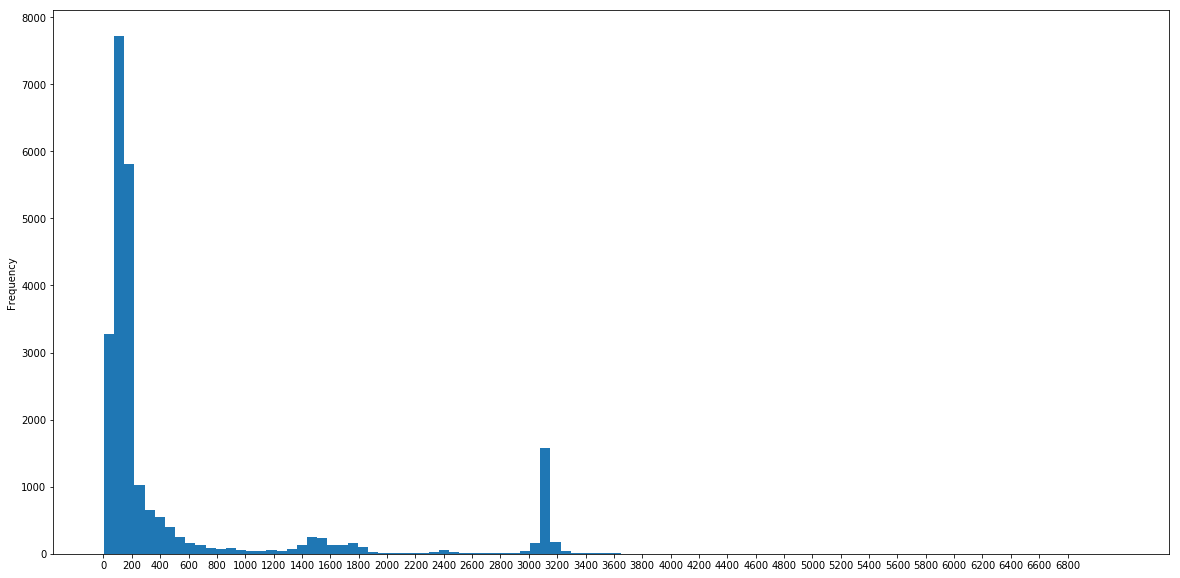

In [40]:
plt.figure(figsize=(20,10))
plt.xticks(np.arange(0,7000,200))
data['duration'].plot.hist(bins=100)

In [123]:
data.loc[data['duration']<1000,'group']='short'

In [124]:
data.loc[(data['duration']>1000) & (data['duration']<3000),'group']='medium'

In [125]:
data.loc[data['duration']>3000,'group']='long'

In [37]:
data.groupby('group').mean()

,view,likes,dislikes,comments,duration,like_ratio
group,,,,,,
long,6259.832679,37.144505,8.360049,9.111169,3130.084846,3.410474
medium,17161.249409,93.370215,33.147129,27.699703,1668.814530,5.217875
short,10514.736219,121.409839,23.310749,11.926286,173.076293,6.406603


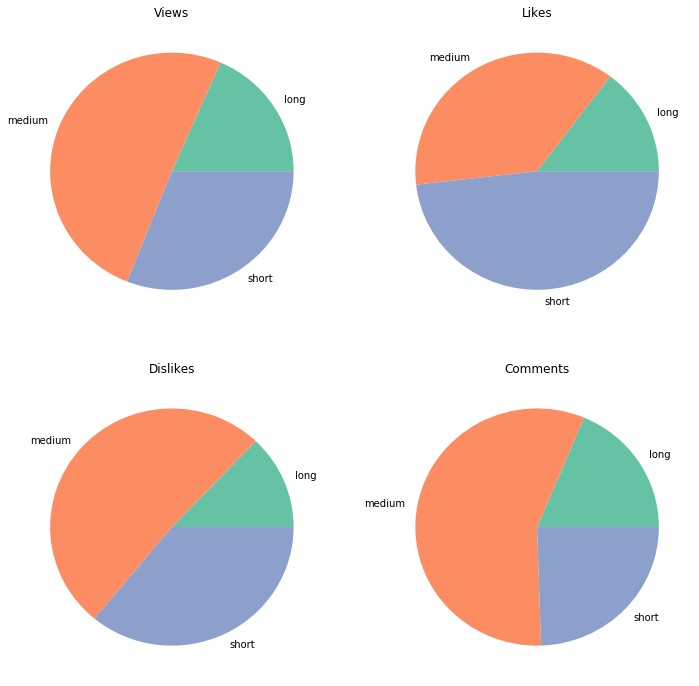

In [55]:
from matplotlib import cm
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.title('Views')
plt.pie(data.groupby('group').mean()['view'],labels=['long','medium','short'] ,colors=[cm.Set2(i) for i in range(3)]);
plt.subplot(2,2,2)
plt.title('Likes')
plt.pie(data.groupby('group').mean()['likes'],labels=['long','medium','short'],colors=[cm.Set2(i) for i in range(3)]);
plt.subplot(2,2,3)
plt.title('Dislikes')
plt.pie(data.groupby('group').mean()['dislikes'],labels=['long','medium','short'],colors=[cm.Set2(i) for i in range(3)]);
plt.subplot(2,2,4)
plt.title('Comments')
plt.pie(data.groupby('group').mean()['comments'],labels=['long','medium','short'],colors=[cm.Set2(i) for i in range(3)]);


# The medium length videos outperform the other categories in terms of views, dislikes and comments, but the shorter videos gather more likes

In [151]:
from sklearn import preprocessing
x=(length_groups.fillna(0)).values
std_scaler=preprocessing.StandardScaler()
x_scaled =std_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)


In [159]:
df.columns=['view','likes','dislikes','comments','like_ratio','discussion_factor']

In [141]:
length_groups=data.groupby('group').mean()

In [146]:
length_groups.drop(['year_block','month_block','duration'],axis=1,inplace=True)

In [147]:
length_groups

,view,likes,dislikes,comments,like_ratio,discussion_factor
group,,,,,,
long,6259.832679,37.144505,8.360049,9.111169,3.410474,0.001009
medium,17161.249409,93.370215,33.147129,27.699703,5.217875,0.001011
short,10514.736219,121.409839,23.310749,11.926286,6.406603,0.000731


In [164]:
df.index=['long','medium','short']

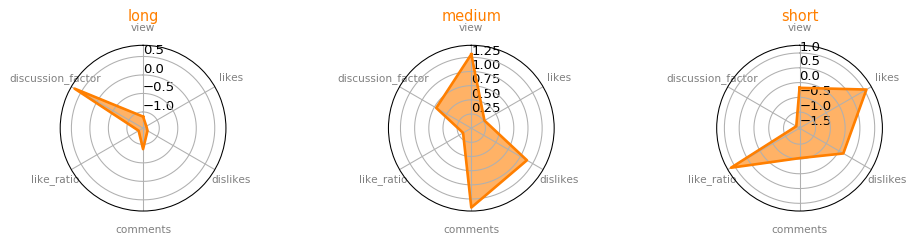

In [173]:
from utils import make_spider
my_dpi=95
plt.figure(figsize=(1200/my_dpi, 900/my_dpi), dpi=my_dpi) 
plt.subplots_adjust(hspace=0.55)
my_palette = plt.cm.get_cmap("Set1", len(df.index))

for row in range(0, 3):
    make_spider(df,row=row, title=(df.index[row]), color=my_palette(1))

## Reaching the same conclusion using a different plot